Game of Thrones
===
Actors/Actress 
---
How awesome of the makeup work! 


Steps
---
1. Download the pictures of actress/actors in Game of Thrones, [[1]](http://www.eonline.com/news/871858/game-of-thrones-boss-on-jon-snow-and-daenerys-targaryen-s-complicated-attraction), saved in folder, "imgs/original";
- split each image into two, after/before makeup, and save it in folder, "imgs/final",
- crop the part of face in each image and save it into folder in "imgs/cvdata".
- use pre-trained features, availed by opencv official site, to recognize whether the image is face of someone or not;
- find similar images


Source and Installation
---
1. <a href="http://www.eonline.com/news/871858/game-of-thrones-boss-on-jon-snow-and-daenerys-targaryen-s-complicated-attraction">Game of Thrones</a>
- [opencv-4, and opencv_contrib](http://http://opencv.org)
  - install by **pip**: 
    ```
    shell> pip install opencv-python
     or
    shell> pip install opencv-python-contrib
    ```
  - install from scratch, a little computer skills required, surely patience too, see below.
- [dlib](https://github.com/davisking/dlib), by ```pip install dlib```, develop tools required, gcc, xcode for instance.
- [face_recognition](https://github.com/ageitgey/face_recognition), by ```pip install face_recognition```
- [scikit_image] by `pip install scikit-image`,
- 

Note
---
1. Compile on Mac: open console, execute ` shell > sudo su` in super user mode, and make change if necessary.
- For Windows user, we provide a self-contained Portable Linux system, based on Porteus Linux (64bit), which hosted on USB stick.
  - a) Pesss ` ESC, F1, F2, F8 or F10` key to set the first OS-privilege boot sequence to the USB stick, save and reboot again.  
  - a) Open the` Settings` app. Navigate to `Update & security > Recovery`. b) Click the `Restart now` button in the `Advanced startup` section. c) Your PC will **restart**, and you will get `Choose an option` screen after the restart. Click `Use another operating system` tile. d) On the Choose an operating system screen, click `Change defaults`. e) Next, you will see `Options` screen. Here, click `Choose a default operating system` tile. f) Finally, click on the OS entry that you want to set as default to make it the default.
  
While boot from USB stick, wait for it to enter system.
- the super user, comes with `User/Passwords: root/toor`.
- change the display setting,
- change the internet setting
- open concole,
  - execute ` shell > IPyDB.sh`
- open Firefox as the browser,
  - visit `https://127.0.0.1:8888` and login with passwords, `demo`. et voila.
- After work or before shutdown, open `File management`, split widowns and duplicate all the working files/folders to the USB stick.


<big style="font-size:2em;color:yellow;background-color:black;">
**ö|ö**   <big style="font-size:0.7em;color:brown;background-color:white;"> 
 &nbsp;Load tool for layout
</big>&nbsp;
</big>

Dou you have any layout/printout problem? Now you can try the new package, appmode:
```
> pip install appmode
> jupyter nbextension     enable --py --sys-prefix appmode
> jupyter serverextension enable --py --sys-prefix appmode
```

<big style="font-size:2em;color:yellow;background-color:black;">
**ô|ô**   <big style="font-size:0.7em;color:brown;background-color:white;"> 
 &nbsp;Load necessary modules
</big>&nbsp;
</big>

In [1]:
from PIL import Image
import glob, os

import matplotlib.image as mplimg
from skimage.transform import resize, rotate
from skimage.color import rgb2gray,rgb2grey
import numpy as np
#import mahotas as mh
import cv2
#import dlib
#import scipy.misc
#import pickle
import face_recognition
import matplotlib.pyplot as plt

%matplotlib inline

[wartermark](https://github.com/rasbt/watermark): An IPython magic extension for printing date and time stamps, version numbers, and hardware information, installed by pip
```
pip install watermark
```

In [2]:
%load_ext watermark

In [3]:
%watermark -a "diffusion" -u -n -t -z -v -m -p skimage,cv2,dlib,face_recognition -g

diffusion 
last updated: Tue Apr 16 2019 11:23:53 CST

CPython 3.6.5
IPython 7.4.0

skimage 0.15.0
cv2 4.0.0
dlib 19.7.99
face_recognition 1.2.3

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.5.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   :


<big style="font-size:2em;color:yellow;background-color:black;">
**o|o**   <big style="font-size:0.7em;color:brown;background-color:white;"> 
&nbsp;Oringinal Images: **imgs/original/*.jpg**&nbsp;
</big>&nbsp;
</big>

In [4]:
files=glob.glob("imgs/original/*.jpg")
for file in files:
    print(file)

imgs/original/rs_1024x759-140320152103-425.GofT.emilia.mh.053012_copy.jpg
imgs/original/rs_1024x759-140320154115-1024.Kristian-Nairn.ls.32014.jpg
imgs/original/rs_1024x759-140320154816-1024.Isaac-Hempstead-Wright-.ls.32014.jpg
imgs/original/rs_1024x759-140320151033-425.GofT.nik.mh.053012.jpg
imgs/original/rs_1024x759-140320150836-425.GofT.lena.mh.053012.jpg
imgs/original/rs_1024x759-140320150538-425.2GofT.gleeson.mh.053012.jpg
imgs/original/rs_1024x759-140320151512-425.GofT.maisie.mh.053012.jpg
imgs/original/rs_1024x759-140320155416-1024.Nathalie_Emmanuel.ls.32014.jpg
imgs/original/rs_1024x759-150616160003-1024.Iain-Glen-game-of-thrones.jpg
imgs/original/rs_1024x759-150616160252-1024.Michiel-Huisman-game-of-thrones.jpg
imgs/original/rs_1024x759-140320153046-1024.natalie-dormer-game-of-thrones.ls.32014.jpg
imgs/original/rs_1024x759-150616160125-1024.Dean-Charles-Chapman-game-of-thrones.jpg
imgs/original/rs_1024x759-150616160051-1024.Stephen-Dillane-game-of-thrones.jpg
imgs/original/rs_1

<big style="font-size:2em;color:yellow;background-color:black;">
**🙁|😯**   <big style="font-size:0.7em;color:brown;background-color:white;"> 
&nbsp;One of the actor
</big>&nbsp;
  
</big>
display image is easy in Python, for instance load by function, ```matplotlib.image```, and show the image by ```matplotlib.imshow```: 

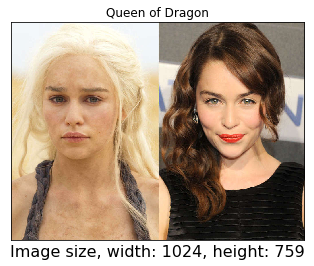

In [5]:
import matplotlib.image as mpimg
img0=mpimg.imread(files[0])

height, width, channels = img0.shape
plt.title("Queen of Dragon")
plt.imshow(img0)
plt.xlabel("Image size, width: %s, height: %s"  %(width, height), size=16)
plt.xticks([]), plt.yticks([]);


In [4]:
face_recognition.load_image_file?

In [6]:
face_recognition.load_image_file(files[0],)

array([[[243, 248, 251],
        [243, 248, 251],
        [243, 248, 251],
        ...,
        [132, 124, 113],
        [131, 123, 112],
        [131, 123, 112]],

       [[243, 248, 251],
        [243, 248, 251],
        [243, 248, 251],
        ...,
        [134, 126, 115],
        [134, 126, 115],
        [133, 125, 114]],

       [[243, 248, 251],
        [243, 248, 251],
        [243, 248, 251],
        ...,
        [136, 128, 117],
        [136, 128, 117],
        [136, 128, 117]],

       ...,

       [[195, 152, 110],
        [196, 153, 111],
        [198, 155, 113],
        ...,
        [ 42,  39,  34],
        [ 45,  42,  37],
        [ 46,  43,  38]],

       [[195, 152, 110],
        [197, 154, 112],
        [198, 155, 113],
        ...,
        [ 41,  38,  33],
        [ 43,  40,  35],
        [ 45,  42,  37]],

       [[196, 153, 111],
        [197, 154, 112],
        [199, 156, 114],
        ...,
        [ 38,  35,  30],
        [ 41,  38,  33],
        [ 43,  40,  35]]

Generally, Image package loads image into 2D array with each element, i.e. pixel, in (r,g,b) format, each with integer value during (0,255). Let's try opencv:

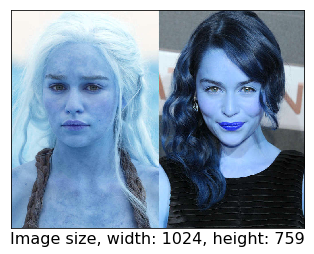

In [8]:
image0 = cv2.imread(files[0])

height, width, channels = image0.shape
plt.imshow(image0)
plt.xlabel("Image size, width: %s, height: %s"  %(width, height), size=16)
plt.xticks([]), plt.yticks([]);

But opencv uses the reverse format <font color="red">(b,g,r)</font> 

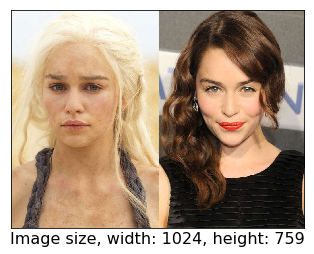

In [9]:
image0 = cv2.imread(files[0])

# BGR changed to RGB
b,g,r = cv2.split(image0)       # get b,g,r
image0_rgb = cv2.merge([r,g,b])     # switch it to rgb

height, width, channels = image0_rgb.shape
plt.imshow(image0_rgb)
plt.xlabel("Image size, width: %s, height: %s"  %(width, height), size=16)
plt.xticks([]), plt.yticks([]);

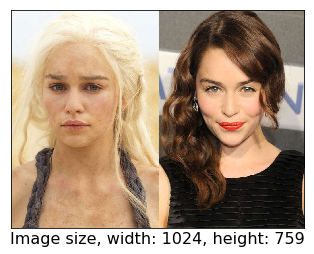

In [10]:
# Convert by cv2 directly
image0 = cv2.imread(files[0])

# BGR changed to RGB
image0_rgb = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
height, width, channels = image0_rgb.shape
plt.imshow(image0_rgb)
plt.xlabel("Image size, width: %s, height: %s"  %(width, height), size=16)
plt.xticks([]), plt.yticks([]);

<big style="font-size:2em;color:yellow;background-color:black;">
**õ|o**   <big style="font-size:0.7em;color:brown;background-color:white;padding:-2pt"> 
&nbsp;Split one into two equally &nbsp;
</big>
</big>

<div>

<pre>

(0,0)--------- x ----------- (2 x grid,0)
 |           (xgrid,0)          |
 |             |                |
 |             |                |
 |           (xgrid,ygrid)      |
(0.ygrid)-----  x ---------- ((2 x grid,ygrid)
</pre>

In [11]:
# by PIL/pillow

img = Image.open(files[0])
(width, height)=img.size
print("Image size, width: %s, height: %s"  %(img.size[0],img.size[1]))

Image size, width: 1024, height: 759


In [13]:
xgrid=width//2
ygrid=height

for i in range(len(files)):
    img = Image.open(files[i])
    
    bbox1=(0,0,xgrid,ygrid)
    bbox2=(xgrid,0,2*xgrid,ygrid)
        
    slice_bit=img.crop(bbox1)
    #slice_bit.save('imgs/final/m_'+str(i)+'_1.jpg', optimize=True, bits=6)
    slice_bit.save('imgs/final/m_'+str(i)+'_1.jpg')
    slice_bit=img.crop(bbox2)
    slice_bit.save('imgs/final/m_'+str(i)+'_2.jpg')

In [14]:
import matplotlib.image as mplimg
import matplotlib.pyplot as plt
from skimage.transform import resize, rotate
from skimage.color import rgb2gray,rgb2grey
import numpy as np
import mahotas as mh
import cv2

<big style="font-size:2em;color:yellow;background-color:black;">
**🛶|⚽️**   <big style="font-size:0.7em;color:brown;background-color:white;padding:-2pt"> 
&nbsp; Training  &nbsp;
</big>
</big>

Trained data fron OpenCV
---
trained classifiers for detecting objects of a particular type, e.g. faces (frontal, profile)
can be found at sub-folder of <a href="https://github.com/opencv/opencv/tree/master/data">OpenCV</a>, <b>data</b>.

<img src="imgs/haarfeatures.png" />

To use the model trained by opencv, download XML's from 
[opencv official](https://github.com/opencv/opencv/tree/master/data/haarcascades), and put directory as below:

In [15]:
# Create the haar cascade
faceCascade = cv2.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
faceCascade2 = cv2.CascadeClassifier('classifier/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('classifier/haarcascade_eye.xml')

In [16]:
origdir="imgs/final"
dirname="imgs/cvdata/"
#actress="m_13_1.jpg"

In [20]:
# choose one image randomly 

ind=np.random.randint(1,40,1)

actressimg=origdir+"/m_"+str(ind[0])+"_1.jpg"
actress="m_"+str(ind[0])+"_1.jpg"
print(actress)

m_25_1.jpg


- faceCascade.detectMultiScale( ... )
  - scaleFactor=1.1, ratio of scan one jump to next one,
  - minSize=(30, 30): minimum size of object want to be recognized 
- ```cv2.rectangle(img, (x, y), (x+w, y+h), (r, g, b), width)```, create a rectangle with width x height, w x h. 

In [21]:
# Read the image
image = cv2.imread(actressimg)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE # for old version
)

print("Found {0} faces!".format(len(faces)))

Found 1 faces!


In [22]:
faces

array([[115, 129, 331, 331]], dtype=int32)


```
faceCascade.detectMultiScale(...) return
the coordinates back, (x,y,h,k):

   (x,y)... ...x       
     .         .
     .         .
     .         .
     x.....(x+h,y+k)
```


Grabbed face picture saved in imgs/cvdata/, (331 px x 331 px), as m_25_1.jpg 


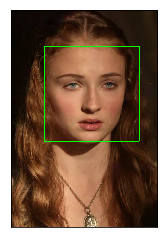

In [23]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    faceimage=image[y:y+h,x:x+w]
    cv2.imwrite(dirname+actress,faceimage)
    print("Grabbed face picture saved in %s, (%s px x %s px), as %s " %(dirname,w,h,actress))
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# BGR changed to RGB
# b,g,r = cv2.split(image)       # get b,g,r
# image_rgb = cv2.merge([r,g,b])     # switch it to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.xticks([]), plt.yticks([]);

Found 1 faces!
Grabbed face picture saved in imgs/cvdata/, (326 px x 326 px), as m_25_1.jpg 


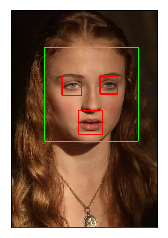

In [24]:
# Read the image
image = cv2.imread(actressimg)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
    #flags = cv2.CV_HAAR_SCALE_IMAGE
)

print("Found {0} faces!".format(len(faces)))

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    faceimage=image[y:y+h,x:x+w]
    cv2.imwrite(dirname+actress,faceimage)
    print("Grabbed face picture saved in %s, (%s px x %s px), as %s " %(dirname,w,h,actress))
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),4)

# BGR changed to RGB
b,g,r = cv2.split(image)       # get b,g,r
image_rgb = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(image_rgb)
plt.xticks([]), plt.yticks([]);

<big style="font-size:2em;color:yellow;background-color:black;">
**🌎|🔛**   <big style="font-size:0.7em;color:brown;background-color:white;padding:-2pt"> 
&nbsp; Flask &nbsp;
</big>
</big>

A compact Python web-development package, which capable of  Model-View-Template (MVT) framework.

1. install flask
<pre style="color:brown;font-family:geogia;font-size:1.2em">
shell> pip install flask
</pre>

<big style="font-size:2em;color:yellow;background-color:black;">
**✍️|🌪**   <big style="font-size:0.7em;color:brown;background-color:white;padding:-2pt"> 
&nbsp; Five Minutes for Basics of Flask;
</big>
</big>

1. Here the web sites host designed at box is as follows:
<pre>
   🔻[📂 App Folder]
         🗒 app.py
         🔻 [📂 templates] 
            🔻[📂 imgs]
             🗒 index.html
         🔻 [📂 static] 
             🗒 test.jpg
</pre>
- <b>app.py</b> is the main code of the web app:

```python
# import the functions of flask
from flask import Flask, render_template

# define the falsk server
app = Flask(__name__)

# setup the home page, index.html 
@app.route('/')
def index():
	return render_template('index.html')

# start the flask server while code was run
if __name__ == '__main__':
	app.run(host='0.0.0.0', port=5000, debug=True)
```
   - we use the route decorator, <font style="color:purple">@app.route('/')</font>, to specify the URL that should trigger the execution of the index function.
   - We used the `run()` function to only run the application on the server when this script is directly executed by the Python interpreter (not being imported), which we ensured using the if statement with 
```python
__name__ == '__main__'
```

- The <font style="color:blue">[templates]</font> directory is the directory where Flask will look for static HTML files to render, here <font style="color:brown">index.html</font> is the defaulted one. 


After completing setup, startup the Flask to provide the service:
```shell
> python app.py
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 ...

``` 

Layout Design
---
According to the purpose of app's function provided, the layout called by ```index()``` function, might be very complicated.   Using wtforms, we could extend the index() function with interactivity much flexibly.

- rsplit('sep',max_sep)

<big style="font-size:2em;color:yellow;background-color:black;">
**🌎|🔛**   <big style="font-size:0.7em;color:brown;background-color:white;padding:-2pt"> 
&nbsp; Face Recognition Web-based App &nbsp;
</big>
</big>

- Project Tree
<pre>
    🔻[📂 App Folder]
       🗒 web_service_example-2.py
       🔻 [📂 classifier]
              🗒 haarcascade_frontalface_default.xml  
  
       🔻[📂 templates] 
          🗒 index.html
          🔻 [📂 imgs]


</pre>
- code

```Python
import face_recognition
from flask import Flask, jsonify, request, redirect, send_file
import cv2

# You can change this to any folder on your system
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg', 'gif'}

app = Flask(__name__)

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/', methods=['GET', 'POST'])
def upload_image():
    # Check if a valid image file was uploaded
    if request.method == 'POST':
        if 'file' not in request.files:
            return redirect(request.url)

        file = request.files['file']

        if file.filename == '':
            return redirect(request.url)

        if file and allowed_file(file.filename):
            # The image file seems valid! Detect faces and return the result.
            return detect_faces_in_image(file)

    # If no valid image file was uploaded, show the file upload form:
    return '''
    <!doctype html>
    <title>Face Recognition Web App</title>
    <h1>Face Recognition App</h1>
    <form method="POST" enctype="multipart/form-data">
      <input type="file" name="file">
      <input type="submit" value="Upload">
    </form>
    '''
def detect_faces_in_image(file_stream):    
    # Load the uploaded image file
    img = face_recognition.load_image_file(file_stream)
    #img = cv2.imread(file_stream)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faceCascade = cv2.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')
    # Get face encodings for any faces in the uploaded image
    #unknown_face_encodings = face_recognition.face_encodings(img)
    
    faces = faceCascade.detectMultiScale(
            gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30) )
    #flags = cv2.CV_HAAR_SCALE_IMAGE
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        faceimage=img[y:y+h,x:x+w]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # convert color from bgr to rgb 
    img1=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    cv2.imwrite("templates/imgs/test.jpg", img1)
    face_found = False

    #if len(faces) > 0:
    #    face_found = True

    # Return the result as json
    result = {
        "face_found_in_image": len(faces)
    }
    if len(faces) > 0:
       return send_file("templates/imgs/test.jpg", mimetype='image/jpeg')
    else:
       return jsonify(result)

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5001, debug=True)

```

- Now open a console under the folder with ```web_service_example-2.py```, and run the web application:
```
> python web_service_example-2.py
```
Open browser and visit "127.0.0.1:888"; upload image and test the face recogntion example.

- Change host address if any real IP given which could provides really online service.
- This could be easily implemented as mobile app, for instance Android. 

In [2]:
from flask import request

<pre>
          
                      No
          If POST      →  Form
             
             ↓ Yes
                      No
         File Send     →  Form
            
             ↓ Yes
                      Yes
         File Null     →  Form 
             
             ↓  No
                                No
         File format allowed     →  Form 
          
             ↓  Yes
        
        detect_faces_in_image(file)   
              
</pre>

How many are faces recognized?
---

In [2]:
from IPython.display import clear_output

In [3]:
# define picture where located
imgdata="imgs/final"
# object directory to put results
outputimgdir="imgs/cvdata"
# names of defaulted pictures 
imgdir=os.path.join( imgdata,"*.jpg")

img_list = glob.glob(imgdir)

In [4]:
k=np.linspace(0,len(img_list),len(img_list)+1,dtype=int)
k[-1]

70

In [7]:
i,j=0,0;
# acclaim (un)-detectPic arrays
detectPic,undetectPic=[],[];

for img in img_list:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30)
    )
    
    if (len(faces)>0):
       detectPic=np.append(detectPic,img)
       clear_output(wait=True)
       #print("Found {0} faces!".format(len(faces)))
       print("%d faces found, %d undetected out" %(i,j)) 
       for (x, y, w, h) in faces:
           faceimage=image[y:y+h,x:x+w]        
           print("Grabbed face picture, (%s px x %s px):" %(w,h))
           resImg=cv2.resize(faceimage,(32,32),interpolation=cv2.INTER_CUBIC)
           cv2.imwrite(outputimgdir+"/"+str(i)+"-1.jpg",resImg)
           #print(outputimgdir+"/"+str(i)+"-1.jpg")
           i=i+1;
    else:
       j=j+1; 
       undetectPic=np.append(undetectPic,img) 

83 faces found, 2 undetected out
Grabbed face picture, (203 px x 203 px):


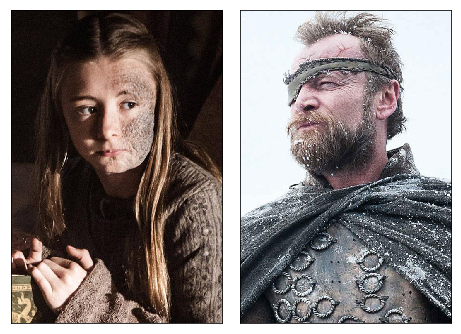

In [8]:
fig = plt.figure(figsize=(16, 12))
i=0
for img in undetectPic:
    image = cv2.imread(img)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(image_rgb)
    ax.set_xticks([]), ax.set_yticks([]);
    i=i+1
plt.tight_layout()  

Computing features from images
===
**Mahotas** avails submodule named mahotas.features, where feature computation functions are available.
<pre>
Installation
> pip install mahotas
</pre>
A commonly used set of texture features is the Haralick. As with many methods in image processing, the name is due to its inventor. These features are texture-based: they distinguish between images that are smooth from those that are patterned, and between different patterns.

A commonly used set of features are the Haralick texture features. As with many methods in image processing, this method was named after its inventor. These features are texture-based: they distinguish between images that are smooth and those that are patterned and have between different patterns. With mahotas, it is very easy to compute them:
```
   haralick_features = np.mean(mh.features.haralick(image),0)
```
The function mh.features.haralick returns a 4x13 array. The  first dimension refers to four possible directions in which to compute the features (up, down, left, and right). If we are not interested in the direction, we can use the mean overall directions. Based on this function, it is very easy to classify a system.


In [12]:
import mahotas as mh

In [20]:
images = glob.glob('imgs/cvdata/*.jpg')
features = []
labels = []
for im in images:
  labels.append(im[len('imgs/cvdata/'):-len('.jpg')])
  #labels.append(im[12:])
  im = mh.imread(im)
  im = mh.colors.rgb2gray(im,dtype=np.uint8)
  features.append(mh.features.haralick(im).ravel())

features = np.array(features)
labels = np.array(labels)

In [15]:
images = glob.glob('imgs/final/*.jpg')
features = []
labels = []
for im in images:
  labels.append(im[len('imgs/final/'):-len('.jpg')])
  #labels.append(im[12:])
  im = mh.imread(im)
  im = mh.colors.rgb2gray(im,dtype=np.uint8)
  features.append(mh.features.haralick(im).ravel())

features = np.array(features)
labels = np.array(labels)

In [21]:
labels

array(['0-1', '1-1', '10-1', '11-1', '12-1', '13-1', '14-1', '15-1',
       '16-1', '17-1', '18-1', '19-1', '2-1', '20-1', '21-1', '22-1',
       '23-1', '24-1', '25-1', '26-1', '27-1', '28-1', '29-1', '3-1',
       '30-1', '31-1', '32-1', '33-1', '34-1', '35-1', '36-1', '37-1',
       '38-1', '39-1', '4-1', '40-1', '41-1', '42-1', '43-1', '44-1',
       '45-1', '46-1', '47-1', '48-1', '49-1', '5-1', '50-1', '51-1',
       '52-1', '53-1', '54-1', '55-1', '56-1', '57-1', '58-1', '59-1',
       '6-1', '60-1', '61-1', '62-1', '63-1', '64-1', '65-1', '66-1',
       '67-1', '68-1', '69-1', '7-1', '70-1', '71-1', '72-1', '73-1',
       '74-1', '75-1', '76-1', '77-1', '78-1', '79-1', '8-1', '80-1',
       '81-1', '82-1', '83-1', '84-1', '85-1', '86-1', '87-1', '88-1',
       '89-1', '9-1', '90-1', '91-1', '92-1', '93-1', '94-1', '95-1',
       'm_10_1', 'm_13_1', 'm_14_1', 'm_16_1', 'm_17_1', 'm_19_1',
       'm_21_1', 'm_24_1', 'm_2_1', 'm_33_1', 'm_4_1', 'm_6_1', 'm_7_1'],
      dtype='<U6'

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
clf = Pipeline([('preproc', StandardScaler()),
                ('classifier', LogisticRegression())])

cv = cross_validation.LeaveOneOut(len(images))
scores = cross_validation.cross_val_score(clf, features, labels, cv=cv)
print('Accuracy: {:.1%}'.format(scores.mean()))

Accuracy: 0.0%


In [115]:
def chist(im):
    # round pixel values range from 0 to 3
    im = im // 64
    r,g,b = im.transpose((2,0,1))
    pixels = 1 * r + 4 * b + 16 * g
    hist = np.bincount(pixels.ravel(), minlength=64)
    hist = hist.astype(float)
    hist = np.log1p(hist)
    return hist

In [116]:
features = []
for im in images:
    imcolor = mh.imread(im)
    im = mh.colors.rgb2gray(imcolor, dtype=np.uint8)
    features.append(np.concatenate([
          mh.features.haralick(im).ravel(),
          chist(imcolor),
      ]))

In [106]:
scores = cross_validation.cross_val_score(
    clf, features, labels, cv=cv)
print('Accuracy: {:.1%}'.format(scores.mean()))

Accuracy: 0.0%


Training Images Data
---
1. link libfreetyle.dylib where it is
2. install harfbuzz-1.5.tar.bz2
3. download opencv_contrib
4. rebuild cv2
  >   ```
       opencv2/bld> cmake -DOPENCV_EXTRA_MODULES_PATH=../opencv_contrib/modules ..
       opencv2/bld> make -j5
      ```
   

In [33]:
import cv2
# recognizer = cv2.face.createLBPHFaceRecognizer()
recognizer = cv2.face.LBPHFaceRecognizer_create()

faceCascade = cv2.CascadeClassifier('classifier/haarcascade_frontalface_default.xml')


def getImagesAndLabels(path):
    #get the path of all the files in the folder
    imagePaths=[os.path.join(path,f) for f in os.listdir(path)] 
    #create empth face list
    faceSamples=[]
    #create empty ID list
    labels=[]
    #labels=labels
    #now looping through all the image paths and loading the Ids and the images
    i=0
    for imagePath in imagePaths:
        #loading the image and converting it to gray scale
        pilImage=Image.open(imagePath).convert('L')
        #Now we are converting the PIL image into numpy array
        imageNp=np.array(pilImage,'uint8')
        #getting the Id from the image
        #label=int(os.path.split(imagePath)[-1].split(".")[1])
        label=i
        # extract the face from the training image sample
        faces=faceCascade.detectMultiScale(imageNp)
        #If a face is there then append that in the list as well as Id of it
        for (x,y,w,h) in faces:
            faceSamples.append(imageNp[y:y+h,x:x+w])
            labels.append(label)
            i=i+1
    return faceSamples,labels

faces,labels= getImagesAndLabels('imgs/final/')
recognizer.train(faces, np.array(labels))
recognizer.save('trainner/trainner.yml')

In [29]:
labels_num=[]
i=0
for label in labels:
    labels_num.append(i);
    i=i+1
    

In [35]:
labels

[0,
 0,
 2,
 3,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 15,
 15,
 18,
 18,
 20,
 20,
 20,
 20,
 20,
 25,
 26,
 27,
 27,
 29,
 30,
 30,
 32,
 33,
 33,
 33,
 36,
 37,
 38,
 39,
 40,
 41,
 41,
 41,
 44,
 44,
 46,
 47,
 48,
 49,
 49,
 49,
 52,
 52,
 54,
 54,
 56,
 57,
 58,
 59,
 60,
 60,
 62,
 62,
 64,
 64,
 66,
 66,
 68,
 68,
 70,
 70,
 70,
 73,
 74,
 75,
 76,
 77,
 78,
 78,
 80,
 80,
 82,
 82,
 84,
 85,
 86,
 87,
 87,
 89,
 90,
 90,
 92,
 93,
 94,
 94,
 94,
 97,
 97,
 99,
 99,
 99,
 102,
 102,
 104,
 104,
 104,
 104,
 108,
 109,
 109,
 109,
 112,
 112]

In [108]:
# assign the name in img_list
imgarray=[""]*len(images)
i=0
for fn in images:
    imgarray[i]=fn
    i=i+1   

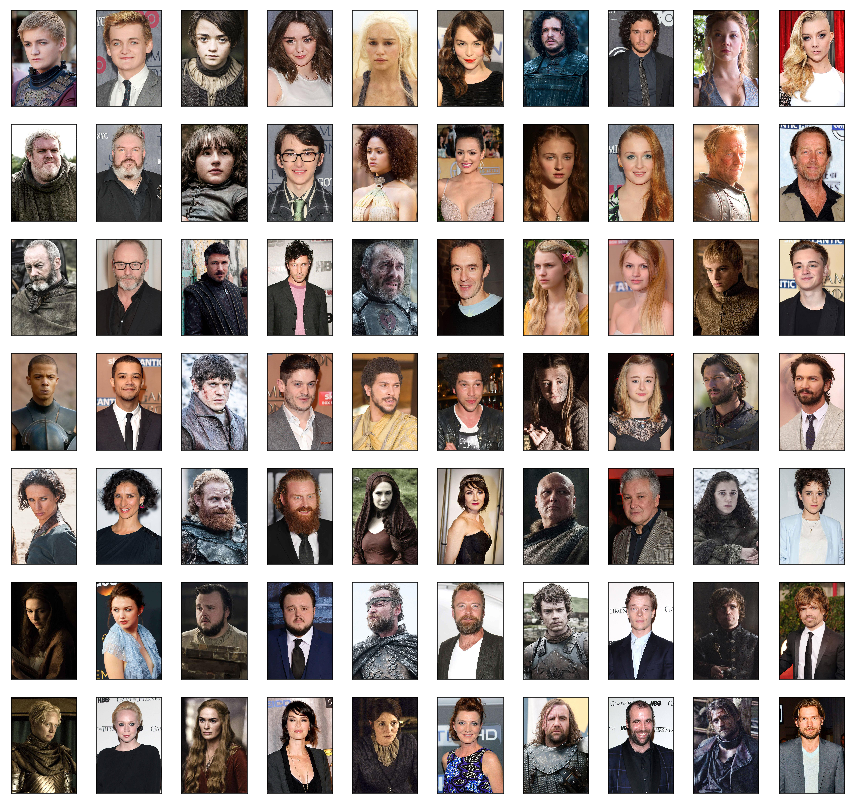

In [109]:
fig = plt.figure(figsize=(12, 16))
# list all images
for i in range(len(img_list)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(mh.imread(imgarray[i]), cmap=plt.cm.gray)
plt.tight_layout()  

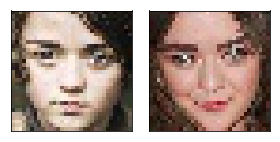

In [84]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/2-1.jpg"), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/3-1.jpg"), cmap=plt.cm.gray)
plt.tight_layout()  

In [62]:
# import the necessary packages
from skimage.measure import compare_ssim
import imutils

In [58]:
# load the two input images
imageA = cv2.imread("imgs/cvdata/2-1.jpg")
imageB = cv2.imread("imgs/cvdata/3-1.jpg")
 
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)


In [59]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3987405283362146


1. Using the compare_ssim  function from scikit-image, we calculate a score  and difference image, diff  (Line 1).
- The score  represents the structural similarity index between the two input images. This value can fall into the range [-1, 1] with a value of one being a “perfect match”.
- The diff  image contains the actual image differences between the two input images that we wish to visualize. The difference image is currently represented as a floating point data type in the range [0, 1] so we first convert the array to 8-bit unsigned integers in the range [0, 255] (Line 2) before we can further process it using OpenCV.

Now, let’s find the contours so that we can place rectangles around the regions identified as “different”:

In [63]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

- On [Line 1] we threshold our diff  image using both cv2.THRESH_BINARY_INV  and cv2.THRESH_OTSU ,both of these settings are applied at the same time using the vertical bar ‘or’ symbol, | . For details on Otsu’s bimodal thresholding setting, see this OpenCV documentation.
- Subsequently we find the contours of thresh  on Lines 2. The ternary operator on Line 2 simply accommodates difference between the cv2.findContours return signature in OpenCV 2.4 and OpenCV 3, respectively.

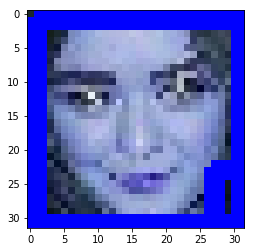

In [71]:
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plt.imshow(imageA)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plt.imshow(imageB)
#plt.imshow(diff)
#plt.imshow(thresh)

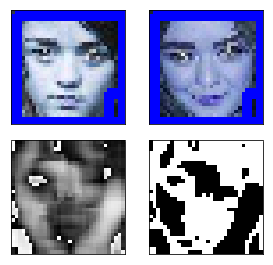

In [76]:
fig = plt.figure(figsize=(4, 8))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(imageA, cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(imageB, cmap=plt.cm.gray)
ax = fig.add_subplot(2, 2, 3, xticks=[], yticks=[])
ax.imshow(diff, cmap=plt.cm.gray)
ax = fig.add_subplot(2, 2, 4, xticks=[], yticks=[])
ax.imshow(thresh, cmap=plt.cm.gray)

plt.tight_layout()

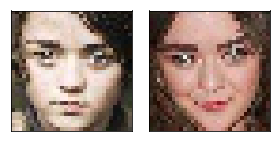

In [56]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/2-1.jpg"), cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(mh.imread("imgs/cvdata/3-1.jpg"), cmap=plt.cm.gray)
plt.tight_layout()  

A image hashing library written in Python. ImageHash supports:
---
```
average hashing (aHash)
perception hashing (pHash)
difference hashing (dHash)
wavelet hashing (wHash)
```

In [111]:
import imagehash,PIL,six

In [114]:
import sys, os, imagehash

def find_similar_images(userpath, hashfunc = imagehash.average_hash):
    import os
    def is_image(filename):
        f = filename.lower()
        return f.endswith(".png") or f.endswith(".jpg") or \
            f.endswith(".jpeg") or f.endswith(".bmp") or f.endswith(".gif")
    
    image_filenames = [os.path.join(userpath, path) for path in os.listdir(userpath) if is_image(path)]
    images = {}
    for img in sorted(image_filenames):
        #print(img)
        hash = hashfunc(PIL.Image.open(img))
        images[hash] = images.get(hash, []) + [img]
    
    for k, img_list in six.iteritems(images):
        if len(img_list) > 1:
            print(" ".join(img_list))

In [116]:
hashmethod='ahash'
imgdir="imgs/cvdata"
find_similar_images(userpath=imgdir)

imgs/cvdata/0-1-Copy1.jpg imgs/cvdata/0-1.jpg


Face Recognition not detection
---
Link: <a href="https://github.com/ageitgey">Adam Geitgey site</a>, face_recognition and face_recognition_models. 

<a href="https://medium.com/towards-data-science/facial-recognition-using-deep-learning-a74e9059a150">Facial Recognition Using Deep Learning</a>

1. we will be taking:
Detect/identify faces in an image (using a face detection model) — for simplicity, this tutorial will only use images with one face/person in it, not more/less
- Predict face poses/landmarks (for the faces identified in step 1)
- Using data from step 2 and the actual image, calculate face encodings (numbers that describe the face)
- Compare the face encodings of known faces with those from test images to tell who is in the picture


dlib
---
compiler: 
```
shell> mkdir build; cd build; cmake .. ; cmake --build .

Might change setting by "ccmake .", for instance, install directory.

shell> python setup.py install --no DLIB_USE_CUDA
  or
shell>   python setup.py install --yes USE_AVX_INSTRUCTIONS
```
Check the version of X11-dev, \$anaconda/include/X11 and /usr/include/X11. 

Pre-trained Data
---
1. **[dlib]**: <a href="http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2"> dlib_face_recognition_resnet_model_v1.dat.bz2</a>
- **[dlib]**: <a href="http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"> shape_predictor_68_face_landmarks.dat.bz2</a>

Initialize and Setup
---
Here we import the required library and set up the objects/parameters needed for our face recognition.

In [110]:
# Get Face Detector from dlib
# This allows us to detect faces in images
face_detector = dlib.get_frontal_face_detector()
# Get Pose Predictor from dlib
# This allows us to detect landmark points in faces and understand the pose/angle of the face
shape_predictor = dlib.shape_predictor('classifier/shape_predictor_68_face_landmarks.dat')
# Get the face recognition model
# This is what gives us the face encodings (numbers that identify the face of a particular person)
face_recognition_model = dlib.face_recognition_model_v1('classifier/dlib_face_recognition_resnet_model_v1.dat')
# This is the tolerance for face comparisons
# The lower the number - the stricter the comparison
# To avoid false matches, use lower value
# To avoid false negatives (i.e. faces of the same person doesn't match), use higher value
# 0.5-0.6 works well
TOLERANCE = 0.6


Get face encodings from an image 
---
Here we are writing the function that will take an image filename and give us the face encodings for that image.


In [111]:
# This function will take an image and return its face encodings using the neural network
def get_face_encodings(path_to_image):
    # Load image using scipy
    image = scipy.misc.imread(path_to_image)
    # Detect faces using the face detector
    detected_faces = face_detector(image, 1)
    # Get pose/landmarks of those faces
    # Will be used as an input to the function that computes face encodings
    # This allows the neural network to be able to produce similar numbers for faces of the same people, regardless of camera angle and/or face positioning in the image
    shapes_faces = [shape_predictor(image, face) for face in detected_faces]
    # For every face detected, compute the face encodings
    return [np.array(face_recognition_model.compute_face_descriptor(image, face_pose, 1)) for face_pose in shapes_faces]


Compare faces 
---
Here we are writing the function that will compare a given face encoding with a list of known face encodings. It will return an array of boolean (**True/False**) values that indicate whether or not there was a match.


In [112]:
# This function takes a list of known faces
def compare_face_encodings(known_faces, face):
    # Finds the difference between each known face and the given face (that we are comparing)
    # Calculate norm for the differences with each known face
    # Return an array with True/Face values based on whether or not a known face matched with the given face
    # A match occurs when the (norm) difference between a known face and the given face is less than or equal to the TOLERANCE value
    return (np.linalg.norm(known_faces - face, axis=1) <= TOLERANCE)

Find match 
---
Here we are writing the function that will take a list of known face encodings, list of names of people (corresponding to the list of known face encodings) and a face to find a match for. It will call the function in 3a and return the name of the person with whom the given face matches.


Getting face encodings 
---
for all faces in the images folder, "imgs/svdata":

In [113]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg

image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]

In [8]:
paths_to_images[:3]

['imgs/final/m_0_1.jpg', 'imgs/final/m_0_2.jpg', 'imgs/final/m_10_1.jpg']

In [35]:
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
known_imgs=[]
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print(path_to_image+": no face found!\n")
        #print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    else:   
        # Append the face encoding found in that image to the list of face encodings we have
        known_imgs.append(path_to_image)
        face_encodings.append(get_face_encodings(path_to_image)[0])

imgs/final/m_18_1.jpg: no face found!

imgs/final/m_30_1.jpg: no face found!

imgs/final/m_34_1.jpg: no face found!

imgs/final/m_4_1.jpg: no face found!



Matching each image in test folder with the known faces (one by one)


In [36]:
len(face_encodings)

66

In [37]:
 known_imgs

['imgs/final/m_0_1.jpg',
 'imgs/final/m_0_2.jpg',
 'imgs/final/m_10_1.jpg',
 'imgs/final/m_10_2.jpg',
 'imgs/final/m_11_1.jpg',
 'imgs/final/m_11_2.jpg',
 'imgs/final/m_12_1.jpg',
 'imgs/final/m_12_2.jpg',
 'imgs/final/m_13_1.jpg',
 'imgs/final/m_13_2.jpg',
 'imgs/final/m_14_1.jpg',
 'imgs/final/m_14_2.jpg',
 'imgs/final/m_15_1.jpg',
 'imgs/final/m_15_2.jpg',
 'imgs/final/m_16_1.jpg',
 'imgs/final/m_16_2.jpg',
 'imgs/final/m_17_1.jpg',
 'imgs/final/m_17_2.jpg',
 'imgs/final/m_18_2.jpg',
 'imgs/final/m_19_1.jpg',
 'imgs/final/m_19_2.jpg',
 'imgs/final/m_1_1.jpg',
 'imgs/final/m_1_2.jpg',
 'imgs/final/m_20_1.jpg',
 'imgs/final/m_20_2.jpg',
 'imgs/final/m_21_1.jpg',
 'imgs/final/m_21_2.jpg',
 'imgs/final/m_22_1.jpg',
 'imgs/final/m_22_2.jpg',
 'imgs/final/m_23_1.jpg',
 'imgs/final/m_23_2.jpg',
 'imgs/final/m_24_1.jpg',
 'imgs/final/m_24_2.jpg',
 'imgs/final/m_25_1.jpg',
 'imgs/final/m_25_2.jpg',
 'imgs/final/m_26_1.jpg',
 'imgs/final/m_26_2.jpg',
 'imgs/final/m_27_1.jpg',
 'imgs/final/m_2

In [13]:
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/test/'))
# Get full paths to test images
paths_to_test_images = ['imgs/test/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
names = [x[:-4] for x in image_filenames]
# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()
    # Find match for the face encoding found in this test image
    match = find_match(face_encodings, names, face_encodings_in_image[0])
    # Print the path of test image and the corresponding match
    print(path_to_image, match)

imgs/test/target.jpg 1-1


In [26]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]

In [89]:
# Get path to all the known images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/final'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['imgs/final/' + x for x in image_filenames]
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    else:
        # Append the face encoding found in that image to the list of face encodings we have
        face_encodings.append(get_face_encodings(path_to_image)[0])

Please change image: imgs/final/m_18_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_30_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_34_1.jpg - it has 0 faces; it can only have one
Please change image: imgs/final/m_4_1.jpg - it has 0 faces; it can only have one


In [93]:
len(face_encodings)

66

In [68]:
# Get path to all the test images
# Filtering on .jpg extension - so this will only work with JPEG images ending with .jpg
test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('imgs/test/'))
# Get full paths to test images
paths_to_test_images = ['imgs/test/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
#names = [x[:-4] for x in image_filenames]
names = [x[:-4] for x in known_imgs]

target=[]
dataset=[]

# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        #exit()
    # Find match for the face encoding found in this test image
    else:
        dataset.append(path_to_image)
        match = find_match(face_encodings, names, face_encodings_in_image[0])
        # Print the path of test image and the corresponding match
        target.append(match+".jpg")
        print("target: ",path_to_image, ", known image: ", match)

target:  imgs/test/target0.jpg , known image:  imgs/final/m_0_1
target:  imgs/test/target10.jpg , known image:  imgs/final/m_10_1
target:  imgs/test/target10_2.jpg , known image:  imgs/final/m_10_1
target:  imgs/test/target11_2.jpg , known image:  imgs/final/m_11_1
target:  imgs/test/target12.jpg , known image:  imgs/final/m_6_1
target:  imgs/test/target3.jpg , known image:  imgs/final/m_15_1


let us look at the recognition result:

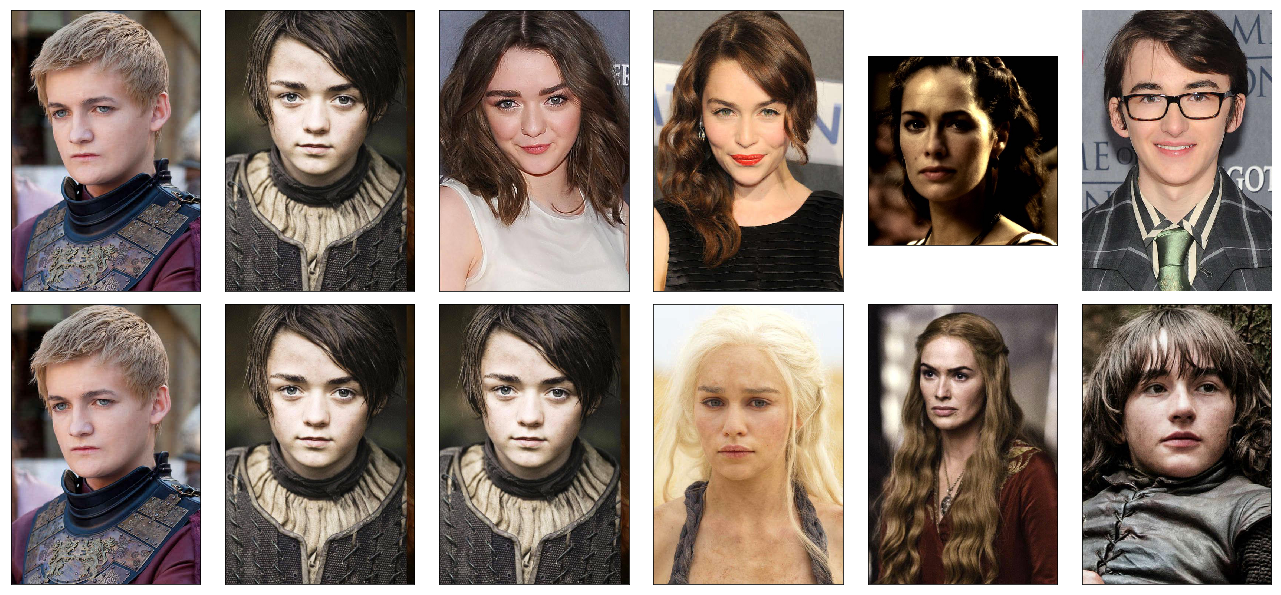

In [66]:
fig= plt.figure(figsize=(3*len(target), 18))
for i in range(len(target)):
    ax = fig.add_subplot(1, len(target), i+1, xticks=[], yticks=[])
    ax.imshow(mh.imread(target[i]), cmap=plt.cm.gray)
 
for i in range(len(target)):
    ax = fig.add_subplot(2, len(target), i+1, xticks=[], yticks=[])
    ax.imshow(mh.imread(dataset[i]), cmap=plt.cm.gray)   
plt.axis("off")    
plt.tight_layout()      

Not bad for this test, right? Especially the fourth comparion, the dragon Queen. 

In [22]:
import face_recognition
known_image = face_recognition.load_image_file("imgs/final/m_6_1.jpg")
unknown_image = face_recognition.load_image_file("imgs/test/target3.jpg")

known_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([know_encoding], unknown_encoding)
results

[True]

Save/Load Training Model
---
1.  Use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file;  later we can load this file to deserialize your model and use it to make new predictions.
- Joblib is part of the SciPy ecosystem and provides utilities for pipelining Python jobs.
It provides utilities for saving and loading Python objects that make use of NumPy data structures, efficiently. This can be useful for some machine learning algorithms that require a lot of parameters or store the entire dataset (like K-Nearest Neighbors).

In [1]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.755905511811


In [3]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
from sklearn.externals import joblib
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
#X = array[:,0:8]
#Y = array[:,8]
#test_size = 0.33
#seed = 7
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
#model = LogisticRegression()
#model.fit(X_train, Y_train)
# save the model to disk
filename2 = 'finalized_model2.sav'
joblib.dump(model, filename2)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename2)
result = loaded_model.score(X_test, Y_test)
print(result)

0.755905511811


In [11]:
# import the necessary packages
import imutils
import cv2
import matplotlib.pyplot as plt
# ensure the plots are inside this notebook, not an external window
%matplotlib inline



In [14]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("imgs/final/m_0_1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayGaussian = cv2.GaussianBlur(gray, (5, 5), 0)

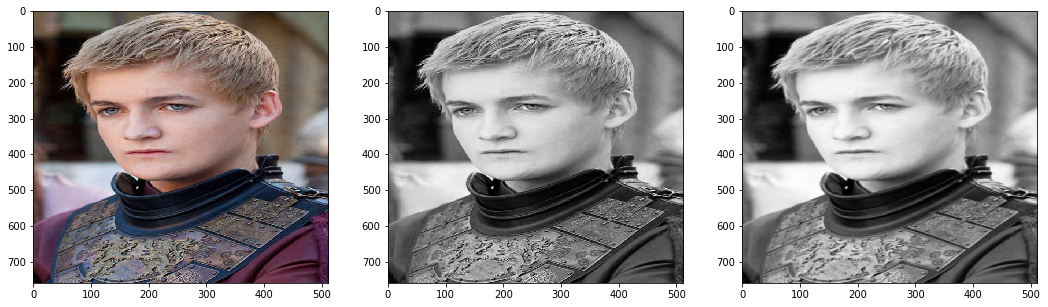

In [15]:
# plot different versions of the hand
f, axarr = plt.subplots(1,3, figsize = (18,5))
axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto', interpolation='nearest')
axarr[1].imshow(gray, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[2].imshow(grayGaussian, cmap='Greys_r', aspect='auto', interpolation='nearest')

In [16]:
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(grayGaussian, 45, 255, cv2.THRESH_BINARY)[1]
threshErode = cv2.erode(thresh, None, iterations=2)
threshDilate = cv2.dilate(threshErode, None, iterations=2)

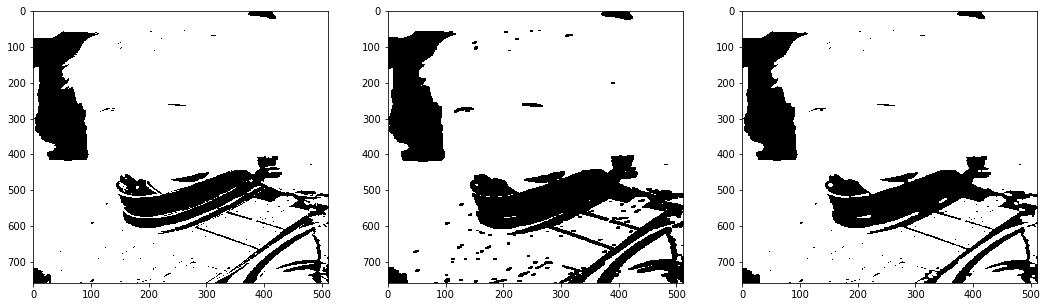

In [18]:
# plot different versions of the hand
f, axarr = plt.subplots(1,3, figsize = (18,5))
axarr[0].imshow(thresh, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[1].imshow(threshErode, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[2].imshow(threshDilate, cmap='Greys_r', aspect='auto', interpolation='nearest')

In [19]:
# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(threshDilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

In [20]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [21]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255, 255],
        [  0, 255, 255],
        [  0, 255, 255]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [ 97, 116, 119],
        [  0, 255, 255],
        [  0, 255, 255]],

       ...,

       [[ 34,  19,  46],
        [ 28,  13,  40],
        [ 20,   6,  30],
        ...,
        [ 71,  45,  75],
        [ 57,  33,  63],
        [ 39,  17,  46]],

       [[ 35,  20,  47],
        [ 26,  11,  38],
        [ 18,   4,  28],
        ...,
        [ 69,  43,  73],
        [ 59,  35,  65],
        [ 46,  24,  53]],

       [[ 34,  19,  46],
        [ 24,   9,  36],
        [ 15,   1,  25],
        ...,
        [ 64,  38,  68],
        [ 60,  36,  66],
        [ 54,  32,  61]]

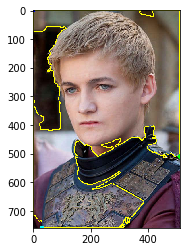

In [22]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))